# **Machine Learning para Business Intelligence** 
#### Profesor: Lucas Gómez Tobón

## Clase 5. Regularización

In [56]:
import os 
import pandas as pd
import numpy as np

In [57]:
# Importamos la base de datos de Boston
df = pd.read_csv("../Datos/boston.csv", sep = ";")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


Esta base tiene información sobre los precios de las casas en Boston y algunas covariables:

- CRIM: tasa de criminalidad per cápita por ciudad
- ZN: proporción de suelo residencial zonificado para lotes de más de 25,000 pies cuadrados.
- INDUS: proporción de acres comerciales no minoristas por ciudad
- CHAS: variable ficticia del río Charles (= 1 si el tramo limita con el río; 0 en caso contrario)
- NOX: concentración de óxidos nítricos (partes por 10 millones)
- RM: número medio de habitaciones por vivienda
- AGE: proporción de unidades ocupadas por sus propietarios construidas antes de 1940
- DIS: distancias ponderadas a cinco centros de empleo de Boston
- RAD: índice de accesibilidad a las carreteras radiales
- TAX: tasa de impuesto a la propiedad de valor total por cada $10,000
- PTRATIO: ratio alumno-profesor por municipio
- B: 1000(Bk - 0.63)^2 donde Bk es la proporción de negros por ciudad
- LSTAT: % de la población pobres
- MEDV: valor medio de las viviendas ocupadas por sus propietarios en miles de dólares

In [58]:
# Dividimos nuestra base de datos en X y en Y
X = df.drop(columns = "MEDV")
y = df["MEDV"]

In [59]:
# Vamos a construir un polinomio de orden 2 para cada todas las variables continuas
from sklearn.preprocessing import PolynomialFeatures 

poly2 = PolynomialFeatures(degree = 2)
X2 = poly2.fit_transform(X)

In [60]:
# Base sin transformar
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [61]:
# Base transformada
pd.DataFrame(X2)

,0,1,2,3,4,5,6,7,8,9,...,95,96,97,98,99,100,101,102,103,104
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,...,87616.0,4528.8,117482.40,1474.08,234.09,6072.570,76.194,157529.6100,1976.5620,24.8004
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,...,58564.0,4307.6,96049.80,2211.88,316.84,7064.820,162.692,157529.6100,3627.6660,83.5396
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,...,58564.0,4307.6,95064.86,975.26,316.84,6992.374,71.734,154315.4089,1583.1049,16.2409
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,...,49284.0,4151.4,87607.86,652.68,349.69,7379.581,54.978,155732.8369,1160.2122,8.6436
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,...,49284.0,4151.4,88111.80,1183.26,349.69,7422.030,99.671,157529.6100,2115.4770,28.4089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,...,74529.0,5733.0,107013.27,2639.91,441.00,8231.790,203.070,153656.1601,3790.5433,93.5089
502,1.0,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,...,74529.0,5733.0,108353.70,2478.84,441.00,8334.900,190.680,157529.6100,3603.8520,82.4464
503,1.0,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,...,74529.0,5733.0,108353.70,1539.72,441.00,8334.900,118.440,157529.6100,2238.5160,31.8096
504,1.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,...,74529.0,5733.0,107411.85,1769.04,441.00,8262.450,136.080,154802.9025,2549.5560,41.9904


In [62]:
# Dividimos la base en Train vs Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.3, random_state = 50)

In [63]:
# Creemos dos modelos de regresión lineal
# Modelo 1: Precio vs % de pobres
# Modelo 2: Previos vs Todas las variables, Todas las variables elevadas al cuadrado y todas las interacciones

from sklearn.linear_model import LinearRegression
modelo1 = LinearRegression()
modelo2 = LinearRegression()

In [64]:
# Queremos hacer LSTAT vs MEDV. Como LSTAT es la columna número 13 dentro de df y X, en X_train va a ser la columna 14 
# o sea está en el índice 13
modelo1.fit(X = X_train[:, 13].reshape(-1, 1), y = y_train)

LinearRegression()

In [65]:
# Para el Modelo 2 si queremos incluir todas las variables
modelo2.fit(X = X_train, y = y_train)

LinearRegression()

In [66]:
# Construyamos la predicción dentro y fuera de muestra de cada modelo
y_hat_in1 = modelo1.predict(X_train[:, 13].reshape(-1, 1))
y_hat_out1 = modelo1.predict(X_test[:, 13].reshape(-1, 1))

y_hat_in2 = modelo2.predict(X_train)
y_hat_out2 = modelo2.predict(X_test)

In [67]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

mae_in1 = mean_absolute_error(y_true = y_train, y_pred = y_hat_in1)
mae_out1 = mean_absolute_error(y_true = y_test, y_pred = y_hat_out1)
mae_in2 = mean_absolute_error(y_true = y_train, y_pred = y_hat_in2)
mae_out2 = mean_absolute_error(y_true = y_test, y_pred = y_hat_out2)

In [68]:
mape_in1 = mean_absolute_percentage_error(y_true = y_train, y_pred = y_hat_in1)
mape_out1 = mean_absolute_percentage_error(y_true = y_test, y_pred = y_hat_out1)
mape_in2 = mean_absolute_percentage_error(y_true = y_train, y_pred = y_hat_in2)
mape_out2 = mean_absolute_percentage_error(y_true = y_test, y_pred = y_hat_out2)

In [69]:
rmse_in1 = mean_squared_error(y_true = y_train, y_pred = y_hat_in1, squared = False)
rmse_out1 = mean_squared_error(y_true = y_test, y_pred = y_hat_out1, squared = False)
rmse_in2 = mean_squared_error(y_true = y_train, y_pred = y_hat_in2, squared = False)
rmse_out2 = mean_squared_error(y_true = y_test, y_pred = y_hat_out2, squared = False)

In [70]:
resultados = pd.DataFrame({"Muestra": ["Insample", "Insample", "Outsample", "Outsample"], 
              "Modelo": ["Modelo 1", "Modelo 2", "Modelo 1", "Modelo 2"],
              "MAE": [mae_in1, mae_in2, mae_out1, mae_out2],
              "MAPE": [mape_in1, mape_in2, mape_out1, mape_out2],
              "RMSE": [rmse_in1, rmse_in2, rmse_out1, rmse_out2]})

Text(0, 0.5, 'Mean Absolute Error')

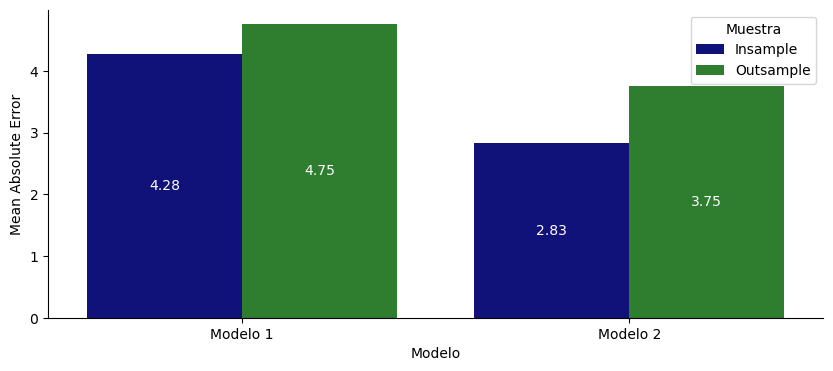

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize = (10, 4))
sns.despine()
sns.barplot(data = resultados, x = "Modelo", y = "MAE", hue = "Muestra", 
            palette = ["darkblue", "forestgreen"], ax = ax)
ax.bar_label(ax.containers[0], fmt = '%.2f', label_type = 'center', color = "white")
ax.bar_label(ax.containers[1], fmt = '%.2f', label_type = 'center', color = "white")
plt.xlabel("Modelo")
plt.ylabel("Mean Absolute Error")

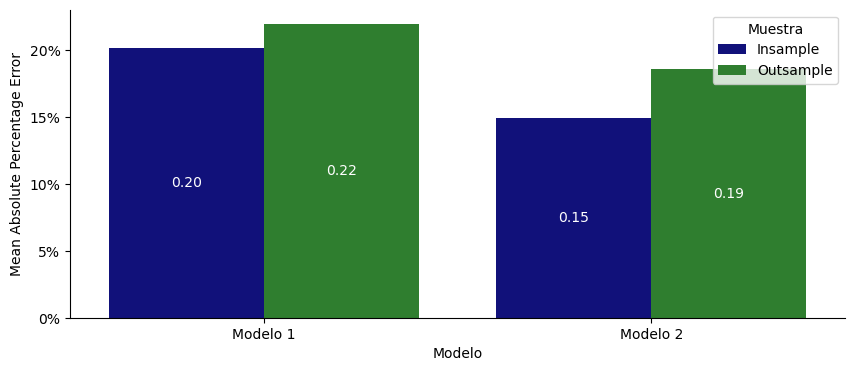

In [72]:
fig, ax = plt.subplots(figsize = (10, 4))
sns.despine()
sns.barplot(data = resultados, x = "Modelo", y = "MAPE", hue = "Muestra", 
            palette = ["darkblue", "forestgreen"], ax = ax)
ax.bar_label(ax.containers[0], fmt = '%.2f', label_type = 'center', color = "white")
ax.bar_label(ax.containers[1], fmt = '%.2f', label_type = 'center', color = "white")
plt.xlabel("Modelo")
plt.ylabel("Mean Absolute Percentage Error")
ax.yaxis.set_major_formatter("{x:0.0%}")

Text(0, 0.5, 'Root Mean Square Error')

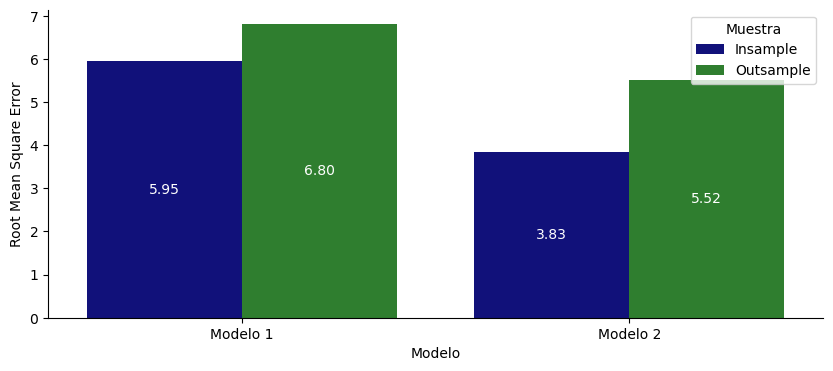

In [73]:
fig, ax = plt.subplots(figsize = (10, 4))
sns.despine()
sns.barplot(data = resultados, x = "Modelo", y = "RMSE", hue = "Muestra", 
            palette = ["darkblue", "forestgreen"], ax = ax)
ax.bar_label(ax.containers[0], fmt = '%.2f', label_type = 'center', color = "white")
ax.bar_label(ax.containers[1], fmt = '%.2f', label_type = 'center', color = "white")
plt.xlabel("Modelo")
plt.ylabel("Root Mean Square Error")

Text(0, 0.5, 'MDEV')

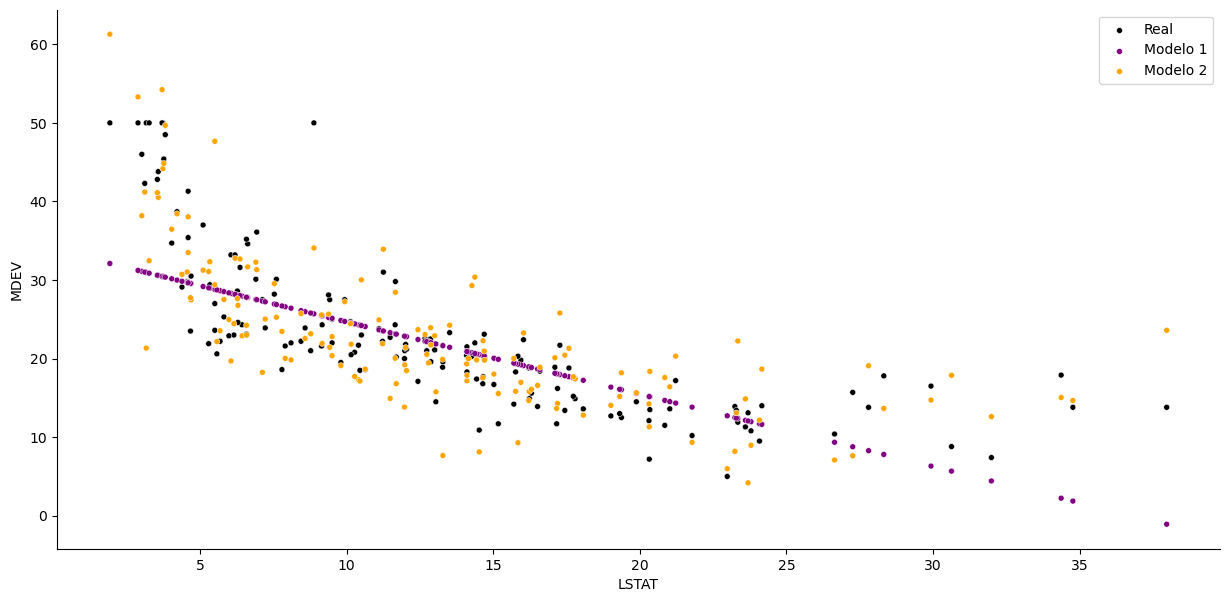

In [74]:
# Veamos el modelo graficamente

fig, ax = plt.subplots(figsize = (15, 7))
sns.despine()
sns.scatterplot(x = X_test[:, 13], y = y_test, color = 'black', size = 5, ax = ax, label = "Real", legend = False)
sns.scatterplot(x = X_test[:, 13], y = y_hat_out1, color = 'purple', size = 5, ax = ax, label = "Modelo 1", legend = False)
sns.scatterplot(x = X_test[:, 13], y = y_hat_out2, color = 'orange', size = 5, ax = ax, label = "Modelo 2", legend = False)
ax.legend(loc = 'best')

ax.set_xlabel("LSTAT")
ax.set_ylabel("MDEV")

## Regularización

El set de datos contiene 101 columnas. Las 100 primeras, nombradas como  V1, ..., V100 recogen el valor de absorbancia para cada una de las 100 longitudes de onda analizadas (predictores), y la columna fat el contenido en grasa medido por técnicas químicas (variable respuesta).

In [75]:
df = pd.read_csv('../Datos/meatspec.csv')
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,fat
1,2.61776,2.61814,2.61859,2.61912,2.61981,2.62071,2.62186,2.62334,2.62511,2.62722,...,2.98145,2.96072,2.94013,2.91978,2.89966,2.87964,2.85960,2.83940,2.81920,22.5
2,2.83454,2.83871,2.84283,2.84705,2.85138,2.85587,2.86060,2.86566,2.87093,2.87661,...,3.29186,3.27921,3.26655,3.25369,3.24045,3.22659,3.21181,3.19600,3.17942,40.1
3,2.58284,2.58458,2.58629,2.58808,2.58996,2.59192,2.59401,2.59627,2.59873,2.60131,...,2.68951,2.67009,2.65112,2.63262,2.61461,2.59718,2.58034,2.56404,2.54816,8.4
4,2.82286,2.82460,2.82630,2.82814,2.83001,2.83192,2.83392,2.83606,2.83842,2.84097,...,2.97367,2.94951,2.92576,2.90251,2.87988,2.85794,2.83672,2.81617,2.79622,5.9
5,2.78813,2.78989,2.79167,2.79350,2.79538,2.79746,2.79984,2.80254,2.80553,2.80890,...,3.30025,3.27907,3.25831,3.23784,3.21765,3.19766,3.17770,3.15770,3.13753,25.5


In [76]:
# df = df.drop(columns = df.columns[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 1 to 215
Columns: 101 entries, V1 to fat
dtypes: float64(101)
memory usage: 171.3 KB


In [77]:
# Construimos la correlación lineal entre todas nuestras variables
cor_matrix = df.corr()

<AxesSubplot:>

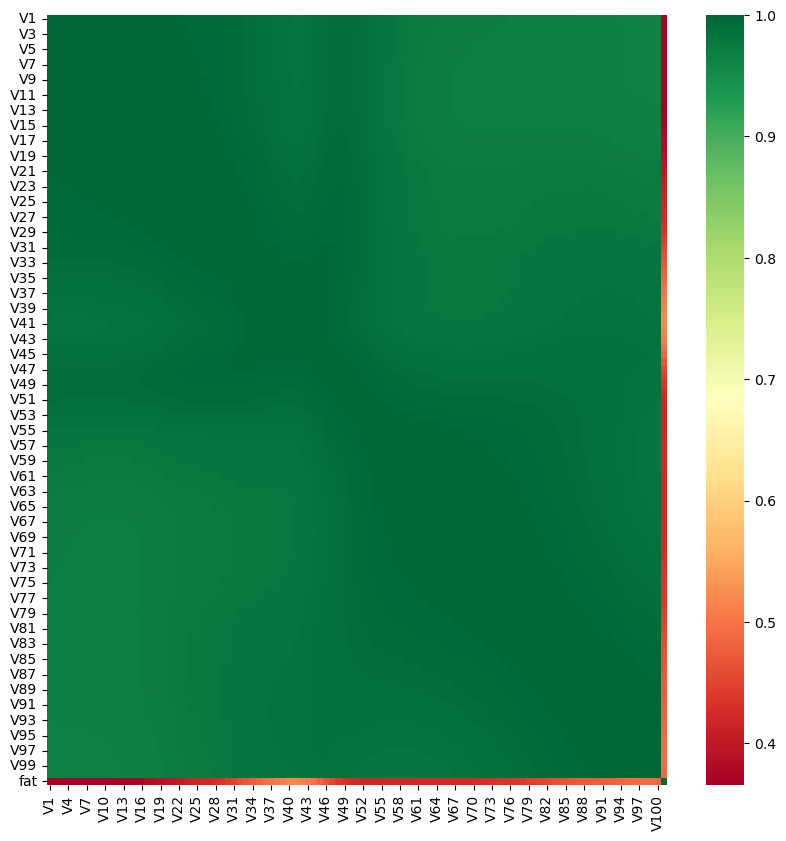

In [78]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(cor_matrix, cmap = "RdYlGn", ax = ax)

In [79]:
# División de los datos en train y test
X = df.drop(columns='fat')
y = df['fat']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size   = 0.7, random_state = 1234, shuffle = True)

In [80]:
from sklearn.preprocessing import StandardScaler
# Escalamos!
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [81]:
# Creamos regresión lineal
modelo = LinearRegression()
modelo.fit(X = X_train, y = y_train)

LinearRegression()

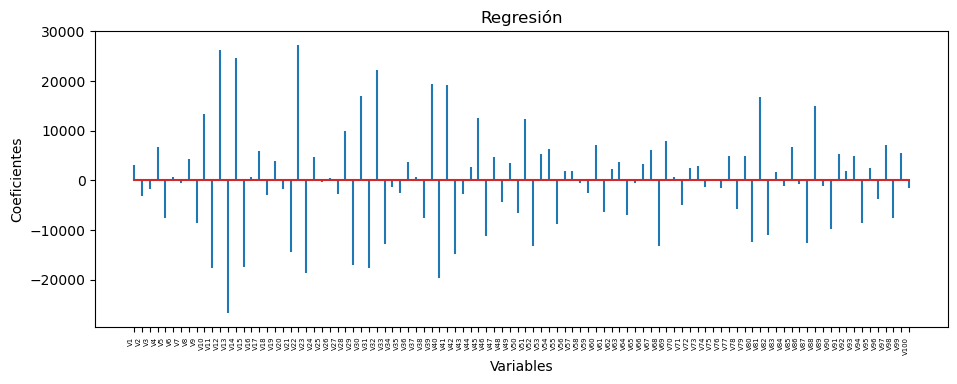

In [82]:
# Coeficientes del modelo
df_coeficientes = pd.DataFrame({'predictor': X.columns,
                                'coef': modelo.coef_.flatten()})

fig, ax = plt.subplots(figsize = (11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt = ' ')
plt.xticks(rotation = 90, ha = 'right', size = 5)
ax.set_xlabel('Variables')
ax.set_ylabel('Coeficientes')
ax.set_title('Regresión');

In [83]:
# Predicciones!
y_hat_in = modelo.predict(X_train)
y_hat_out = modelo.predict(X_test)

mae_in = mean_absolute_error(y_true = y_train, y_pred = y_hat_in)
mae_out = mean_absolute_error(y_true = y_test, y_pred = y_hat_out)
mape_in = mean_absolute_percentage_error(y_true = y_train, y_pred = y_hat_in)
mape_out = mean_absolute_percentage_error(y_true = y_test, y_pred = y_hat_out)
rmse_in = mean_squared_error(y_true = y_train, y_pred = y_hat_in, squared = False)
rmse_out = mean_squared_error(y_true = y_test, y_pred = y_hat_out, squared = False)

In [84]:
resultados = pd.DataFrame({"Muestra": ["Insample", "Outsample"], 
                           "Modelo": ["Regresión lineal", "Regresión lineal"],
                           "MAE": [mae_in, mae_out],
                           "MAPE": [mape_in, mape_out],
                           "RMSE": [rmse_in, rmse_out]})

Text(0, 0.5, 'Root Mean Square Error')

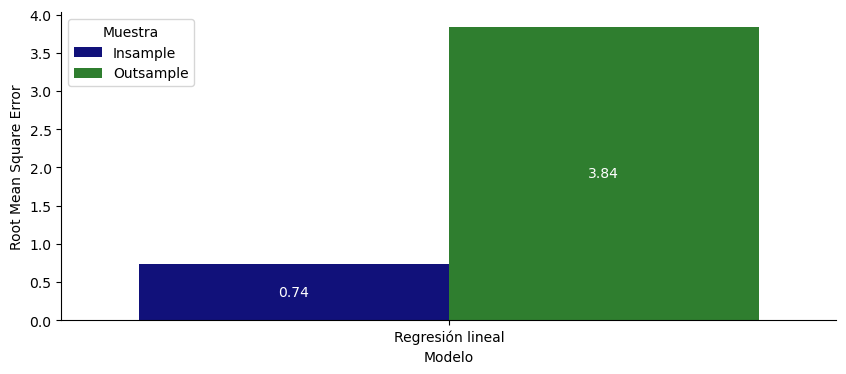

In [85]:
fig, ax = plt.subplots(figsize = (10, 4))
sns.despine()
sns.barplot(data = resultados, x = "Modelo", y = "RMSE", hue = "Muestra", 
            palette = ["darkblue", "forestgreen"], ax = ax)
ax.bar_label(ax.containers[0], fmt = '%.2f', label_type = 'center', color = "white")
ax.bar_label(ax.containers[1], fmt = '%.2f', label_type = 'center', color = "white")
plt.xlabel("Modelo")
plt.ylabel("Root Mean Square Error")

### Ridge

In [86]:
from sklearn.linear_model import RidgeCV
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# Por defecto RidgeCV utiliza el mean squared error
modelo_ridge = RidgeCV(alphas = np.logspace(-10, 2, 200), fit_intercept = True, store_cv_values = True)
modelo_ridge.fit(X = X_train, y = y_train)

RidgeCV(alphas=array([1.00000000e-10, 1.14895100e-10, 1.32008840e-10, 1.51671689e-10,
       1.74263339e-10, 2.00220037e-10, 2.30043012e-10, 2.64308149e-10,
       3.03677112e-10, 3.48910121e-10, 4.00880633e-10, 4.60592204e-10,
       5.29197874e-10, 6.08022426e-10, 6.98587975e-10, 8.02643352e-10,
       9.22197882e-10, 1.05956018e-09, 1.21738273e-09, 1.39871310e-09,
       1.60705282e-09, 1.84642494e-0...
       4.10265811e+00, 4.71375313e+00, 5.41587138e+00, 6.22257084e+00,
       7.14942899e+00, 8.21434358e+00, 9.43787828e+00, 1.08436597e+01,
       1.24588336e+01, 1.43145894e+01, 1.64467618e+01, 1.88965234e+01,
       2.17111795e+01, 2.49450814e+01, 2.86606762e+01, 3.29297126e+01,
       3.78346262e+01, 4.34701316e+01, 4.99450512e+01, 5.73844165e+01,
       6.59318827e+01, 7.57525026e+01, 8.70359136e+01, 1.00000000e+02]),
        store_cv_values=True)

Cuando se utiliza regularización, es útil evaluar cómo se aproximan a cero los coeficientes a medida que se incrementa el valor de alpha así como la evolución del error de validación cruzada en función del alpha empleado.

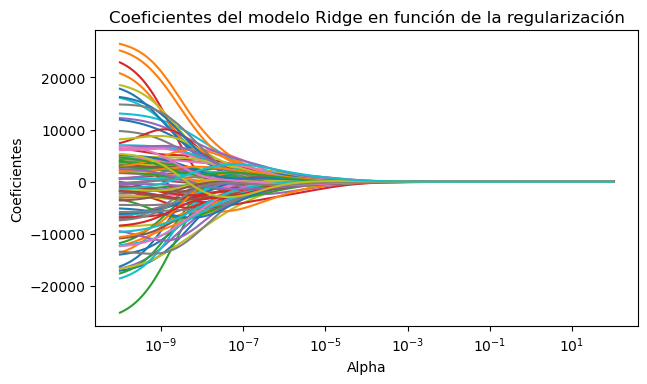

In [87]:
from sklearn.linear_model import Ridge
# Evolución de los coeficientes en función de alpha
alphas = modelo_ridge.alphas
coefs = []

for alpha in alphas:
    modelo_temp = Ridge(alpha = alpha, fit_intercept = False)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('Alpha')
ax.set_ylabel('Coeficientes')
ax.set_title('Coeficientes del modelo Ridge en función de la regularización');
plt.axis('tight')
plt.show()

Puede ver se como, a medida que aumenta el valor de alpha, la regularización es mayor y el valor de los coeficientes se reduce

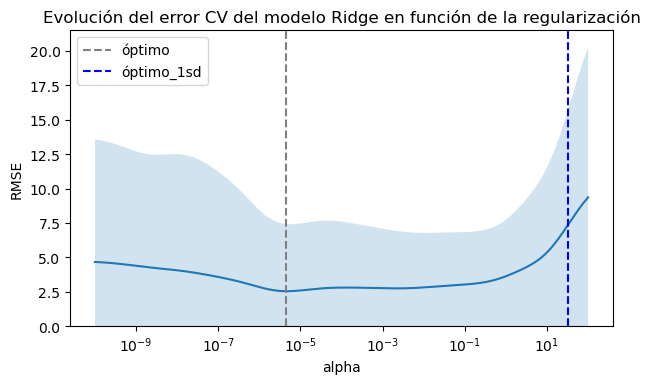

In [88]:
# Evolución del error en función de alpha
# modelo_ridge.cv_values almacena el mse de cv para cada valor de alpha. Tiene
# dimensiones (n_samples, n_targets, n_alphas)
mse_cv = modelo_ridge.cv_values_.reshape((-1, 200)).mean(axis=0)
mse_sd = modelo_ridge.cv_values_.reshape((-1, 200)).std(axis=0)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo_ridge.alphas[np.argmin(rmse_cv)]
optimo_1sd   = modelo_ridge.alphas[rmse_cv == min_rsme_1sd]


# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(modelo_ridge.alphas, rmse_cv)
ax.fill_between(
    modelo_ridge.alphas,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.axvline(
    x         = optimo_1sd,
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1sd'
)
ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV del modelo Ridge en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();

In [89]:
# Mejor valor alpha encontrado
print(f"Mejor valor de alpha encontrado: {modelo_ridge.alpha_}")

Mejor valor de alpha encontrado: 4.397603609302721e-06


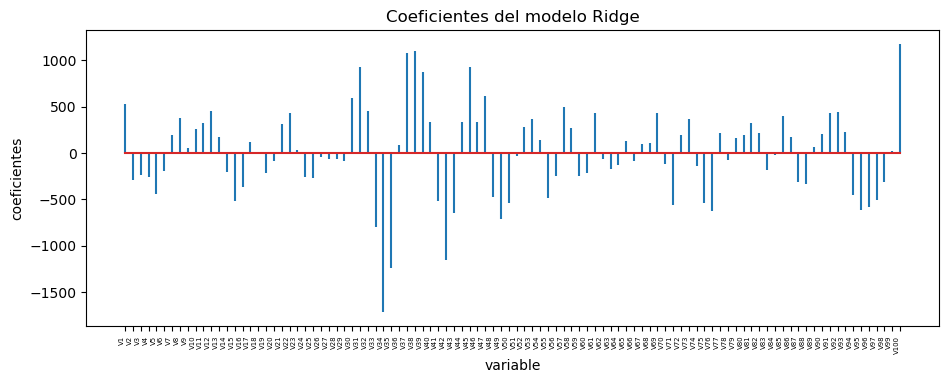

In [90]:
# Coeficientes del modelo
df_coeficientes = pd.DataFrame(
                        {'predictor': X.columns,
                         'coef': modelo_ridge.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo Ridge');

Text(0, 0.5, 'Root Mean Square Error')

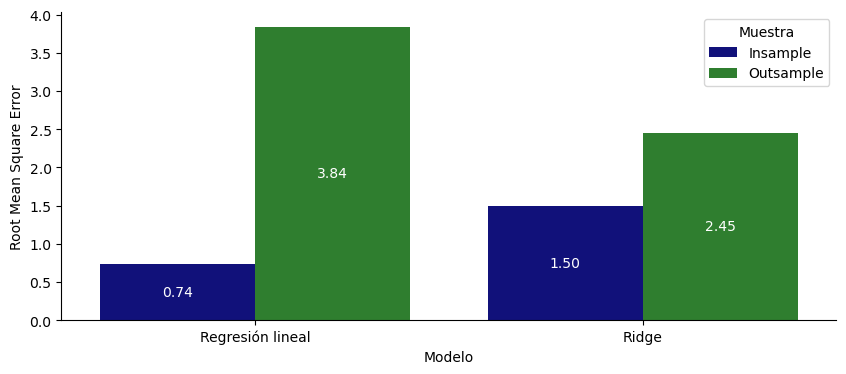

In [91]:
# Predicciones!
y_hat_in = modelo_ridge.predict(X_train)
y_hat_out = modelo_ridge.predict(X_test)

mae_in = mean_absolute_error(y_true = y_train, y_pred = y_hat_in)
mae_out = mean_absolute_error(y_true = y_test, y_pred = y_hat_out)
mape_in = mean_absolute_percentage_error(y_true = y_train, y_pred = y_hat_in)
mape_out = mean_absolute_percentage_error(y_true = y_test, y_pred = y_hat_out)
rmse_in = mean_squared_error(y_true = y_train, y_pred = y_hat_in, squared = False)
rmse_out = mean_squared_error(y_true = y_test, y_pred = y_hat_out, squared = False)

resultado_ridge = pd.DataFrame({"Muestra": ["Insample", "Outsample"], 
                           "Modelo": ["Ridge", "Ridge"],
                           "MAE": [mae_in, mae_out],
                           "MAPE": [mape_in, mape_out],
                           "RMSE": [rmse_in, rmse_out]})

resultados = pd.concat([resultados, resultado_ridge])

fig, ax = plt.subplots(figsize = (10, 4))
sns.despine()
sns.barplot(data = resultados, x = "Modelo", y = "RMSE", hue = "Muestra", 
            palette = ["darkblue", "forestgreen"], ax = ax)
ax.bar_label(ax.containers[0], fmt = '%.2f', label_type = 'center', color = "white")
ax.bar_label(ax.containers[1], fmt = '%.2f', label_type = 'center', color = "white")
plt.xlabel("Modelo")
plt.ylabel("Root Mean Square Error")

### Lasso

In [100]:
from sklearn.linear_model import LassoCV
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# Por defecto LassoCV utiliza el mean squared error
modelo_lasso = LassoCV(n_alphas = 100, cv = 10, tol = 0.01)
modelo_lasso.fit(X = X_train, y = y_train)

c:\Users\Lucas\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.982e+03, tolerance: 2.285e+02
  model = cd_fast.enet_coordinate_descent(


LassoCV(cv=10, tol=0.01)

c:\Users\Lucas\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.312e+02, tolerance: 2.285e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\Lucas\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.566e+02, tolerance: 2.285e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\Lucas\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.716e+02, toleranc

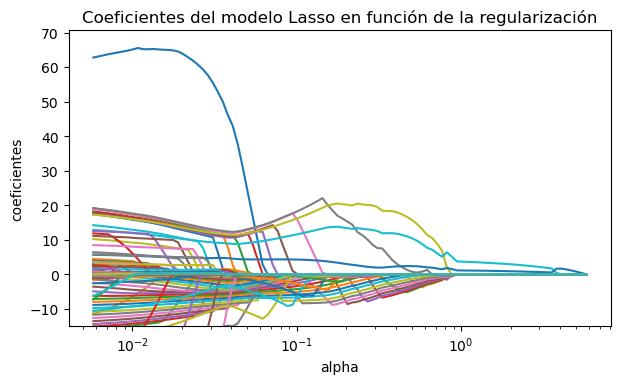

In [102]:
from sklearn.linear_model import Lasso
# Evolución de los coeficientes en función de alpha
alphas = modelo_lasso.alphas_
coefs = []

for alpha in alphas:
    modelo_temp = Lasso(alpha = alpha, tol = 0.01)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_ylim([-15,None])
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo Lasso en función de la regularización');

c:\Users\Lucas\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.312e+02, tolerance: 2.285e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\Lucas\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.566e+02, tolerance: 2.285e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\Lucas\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.716e+02, toleranc

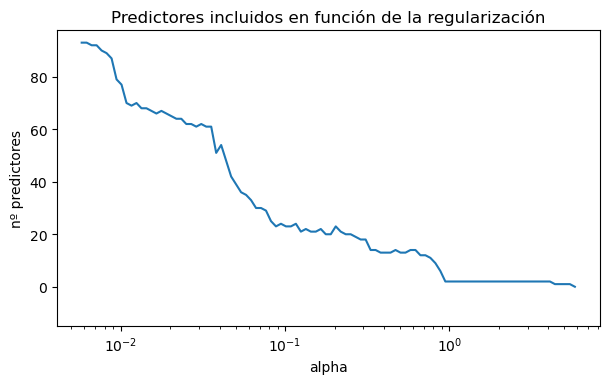

In [103]:
# Número de predictores incluidos (coeficiente !=0) en función de alpha
alphas = modelo_lasso.alphas_
n_predictores = []

for alpha in alphas:
    modelo_temp = Lasso(alpha = alpha, tol = 0.01)
    modelo_temp.fit(X_train, y_train)
    coef_no_cero = np.sum(modelo_temp.coef_.flatten() != 0)
    n_predictores.append(coef_no_cero)

fig, ax = plt.subplots(figsize = (7, 3.84))
ax.plot(alphas, n_predictores)
ax.set_xscale('log')
ax.set_ylim([-15,None])
ax.set_xlabel('alpha')
ax.set_ylabel('nº predictores')
ax.set_title('Predictores incluidos en función de la regularización');

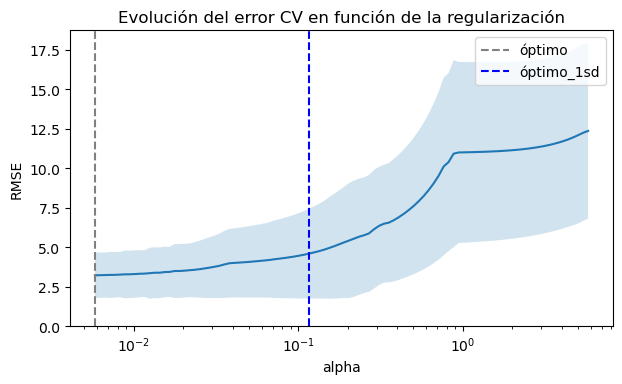

In [104]:
# Evolución del error en función de alpha
# ==============================================================================
# modelo_lasso.mse_path_ almacena el mse de cv para cada valor de alpha. Tiene
# dimensiones (n_alphas, n_folds)
mse_cv = modelo_lasso.mse_path_.mean(axis=1)
mse_sd = modelo_lasso.mse_path_.std(axis=1)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo_lasso.alphas_[np.argmin(rmse_cv)]
optimo_1sd   = modelo_lasso.alphas_[rmse_cv == min_rsme_1sd]

# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(modelo_lasso.alphas_, rmse_cv)
ax.fill_between(
    modelo_lasso.alphas_,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.axvline(
    x         = optimo_1sd,
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1sd'
)

ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();

In [105]:
# Mejor valor alpha encontrado
print(f"Mejor valor de alpha encontrado: {modelo_lasso.alpha_}")

Mejor valor de alpha encontrado: 0.005794705769965233


In [106]:
# Coeficientes del modelo
df_coeficientes = pd.DataFrame(
                        {'predictor': X.columns,
                         'coef': modelo_lasso.coef_.flatten()}
                  )

# Predictores incluidos en el modelo (coeficiente != 0)
df_coeficientes[df_coeficientes.coef != 0]

,predictor,coef
0,V1,62.762672
1,V2,-11.543300
2,V3,-15.725856
3,V4,-15.102437
4,V5,-14.390618
...,...,...
95,V96,0.977141
96,V97,0.738404
97,V98,0.212347
98,V99,0.029874


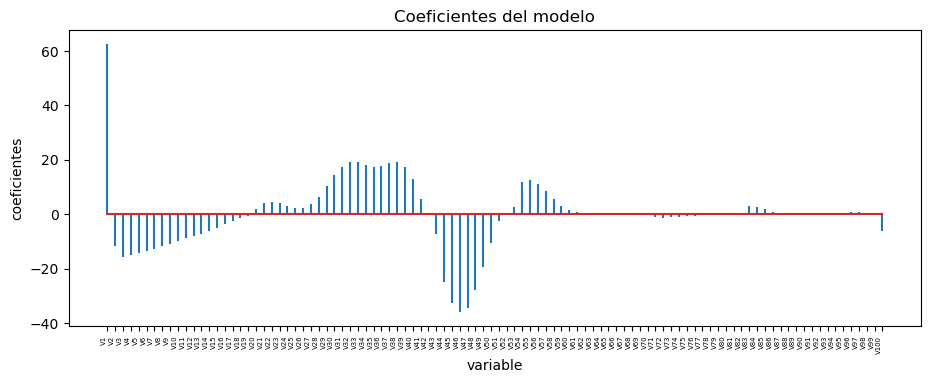

In [107]:
fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

Text(0, 0.5, 'Root Mean Square Error')

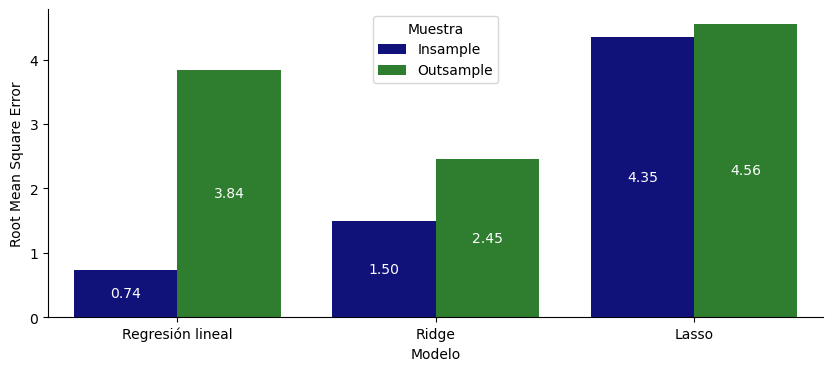

In [108]:
# Predicciones!
y_hat_in = modelo_lasso.predict(X_train)
y_hat_out = modelo_lasso.predict(X_test)

mae_in = mean_absolute_error(y_true = y_train, y_pred = y_hat_in)
mae_out = mean_absolute_error(y_true = y_test, y_pred = y_hat_out)
mape_in = mean_absolute_percentage_error(y_true = y_train, y_pred = y_hat_in)
mape_out = mean_absolute_percentage_error(y_true = y_test, y_pred = y_hat_out)
rmse_in = mean_squared_error(y_true = y_train, y_pred = y_hat_in, squared = False)
rmse_out = mean_squared_error(y_true = y_test, y_pred = y_hat_out, squared = False)

resultado_lasso = pd.DataFrame({"Muestra": ["Insample", "Outsample"], 
                           "Modelo": ["Lasso", "Lasso"],
                           "MAE": [mae_in, mae_out],
                           "MAPE": [mape_in, mape_out],
                           "RMSE": [rmse_in, rmse_out]})

resultados = pd.concat([resultados, resultado_lasso])

fig, ax = plt.subplots(figsize = (10, 4))
sns.despine()
sns.barplot(data = resultados, x = "Modelo", y = "RMSE", hue = "Muestra", 
            palette = ["darkblue", "forestgreen"], ax = ax)
ax.bar_label(ax.containers[0], fmt = '%.2f', label_type = 'center', color = "white")
ax.bar_label(ax.containers[1], fmt = '%.2f', label_type = 'center', color = "white")
plt.xlabel("Modelo")
plt.ylabel("Root Mean Square Error")

### Elastic net

In [109]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# Por defecto ElasticNetCV utiliza el mean squared error
modelo_en = ElasticNetCV(l1_ratio = [0.01, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99],
                      n_alphas = 1000,
                      cv = 10, tol = 0.01)
modelo_en.fit(X = X_train, y = y_train)

c:\Users\Lucas\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.076e+03, tolerance: 2.285e+02
  model = cd_fast.enet_coordinate_descent(


ElasticNetCV(cv=10, l1_ratio=[0.01, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99],
             n_alphas=1000, tol=0.01)

In [110]:
# Evolución del error en función de alpha y l1_ratio
# modelo_en.mse_path_ almacena el mse de cv para cada valor de alpha y l1_ratio.
# Tiene dimensiones (n_l1_ratio, n_alpha, n_folds)

# Error medio de las 10 particiones por cada valor de alpha y l1_ratio 
mean_error_cv = modelo_en.mse_path_.mean(axis = 2)

# El resultado es un array de dimensiones (n_l1_ratio, n_alpha)
# Se convierte en un dataframe
df_resultados_cv = pd.DataFrame(data = mean_error_cv)
df_resultados_cv["l1_ratio"] = modelo_en.l1_ratio
df_resultados_cv = df_resultados_cv.melt(id_vars = "l1_ratio", value_name = "mse_cv").drop(columns = "variable")
df_resultados_cv["alphas"] = modelo_en.alphas_.flatten()

df_resultados_cv['rmse_cv'] = np.sqrt(df_resultados_cv['mse_cv'])
df_resultados_cv = df_resultados_cv.reset_index(drop = True).sort_values('mse_cv', ascending = True)
df_resultados_cv

,l1_ratio,mse_cv,alphas,rmse_cv
6991,0.95,10.090533,0.006186,3.176560
6998,0.95,10.094130,0.005894,3.177126
6984,0.95,10.099981,0.006493,3.178047
6977,0.95,10.100200,0.006815,3.178081
6970,0.95,10.100417,0.007153,3.178115
...,...,...,...,...
28,0.01,153.272203,477.471336,12.380315
21,0.01,153.275563,501.150683,12.380451
14,0.01,153.278351,526.004364,12.380563
7,0.01,153.280733,552.090620,12.380660


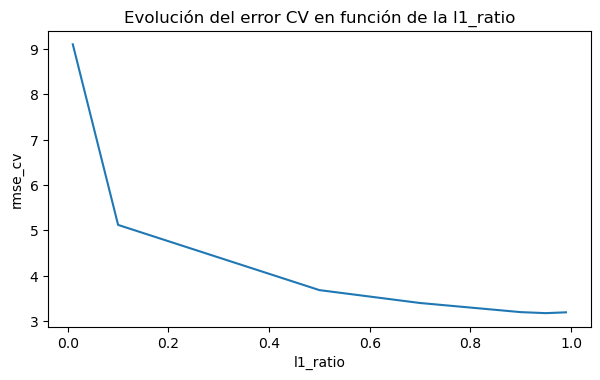

In [111]:
# Mejor valor encontrado para cada l1_ratio
fig, ax = plt.subplots(figsize=(7, 3.84))
df_resultados_cv.groupby('l1_ratio')['rmse_cv'].min().plot(ax = ax)
ax.set_title('Evolución del error CV en función de la l1_ratio')
ax.set_xlabel('l1_ratio')
ax.set_ylabel('rmse_cv');

In [112]:
# Mejor valor alpha y l1_ratio_ encontrado
# ==============================================================================
print(f"Mejor valor de alpha encontrado: {modelo_en.alpha_}")
print(f"Mejor valor de l1_ratio encontrado: {modelo_en.l1_ratio_}")

Mejor valor de alpha encontrado: 0.006142013787173718
Mejor valor de l1_ratio encontrado: 0.95


In [113]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X.columns,
                         'coef': modelo_en.coef_.flatten()}
                  )

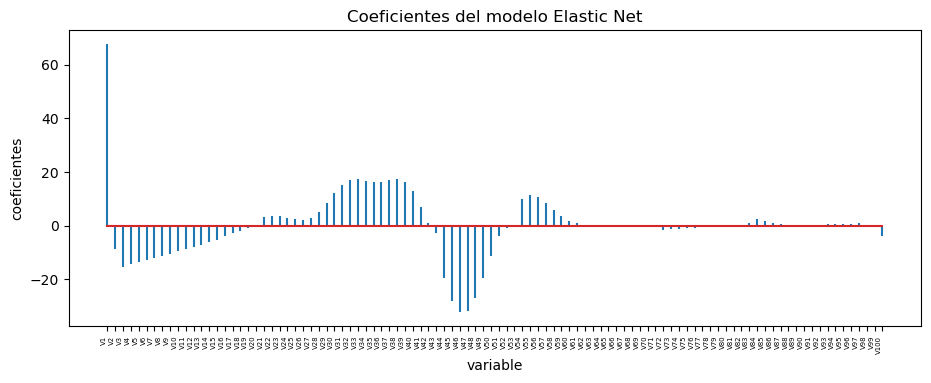

In [114]:
fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo Elastic Net');

Text(0, 0.5, 'Root Mean Square Error')

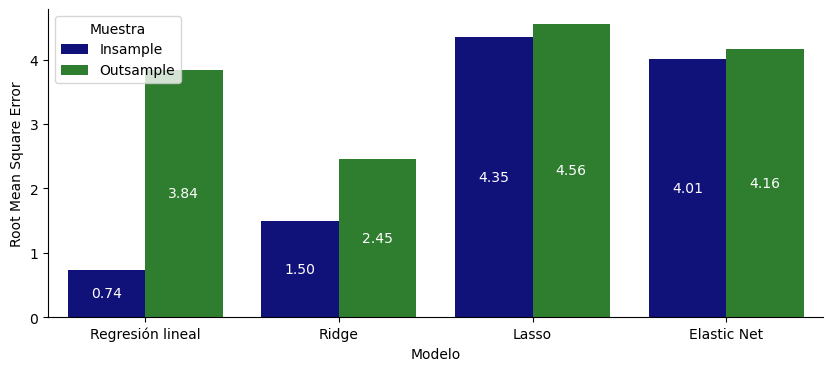

In [115]:
# Predicciones!
y_hat_in = modelo_en.predict(X_train)
y_hat_out = modelo_en.predict(X_test)

mae_in = mean_absolute_error(y_true = y_train, y_pred = y_hat_in)
mae_out = mean_absolute_error(y_true = y_test, y_pred = y_hat_out)
mape_in = mean_absolute_percentage_error(y_true = y_train, y_pred = y_hat_in)
mape_out = mean_absolute_percentage_error(y_true = y_test, y_pred = y_hat_out)
rmse_in = mean_squared_error(y_true = y_train, y_pred = y_hat_in, squared = False)
rmse_out = mean_squared_error(y_true = y_test, y_pred = y_hat_out, squared = False)

resultado_en = pd.DataFrame({"Muestra": ["Insample", "Outsample"], 
                           "Modelo": ["Elastic Net", "Elastic Net"],
                           "MAE": [mae_in, mae_out],
                           "MAPE": [mape_in, mape_out],
                           "RMSE": [rmse_in, rmse_out]})

resultados = pd.concat([resultados, resultado_en])

fig, ax = plt.subplots(figsize = (10, 4))
sns.despine()
sns.barplot(data = resultados, x = "Modelo", y = "RMSE", hue = "Muestra", 
            palette = ["darkblue", "forestgreen"], ax = ax)
ax.bar_label(ax.containers[0], fmt = '%.2f', label_type = 'center', color = "white")
ax.bar_label(ax.containers[1], fmt = '%.2f', label_type = 'center', color = "white")
plt.xlabel("Modelo")
plt.ylabel("Root Mean Square Error")

### Ejercicio.
Utilizando la base de Boston, corra Ridge, Lasso y Elastic Net

In [116]:
# Importamos la base de datos de Boston
df = pd.read_csv("../Datos/boston.csv", sep = ";")
# Dividimos nuestra base de datos en X y en Y
X = df.drop(columns = "MEDV")
y = df["MEDV"]

In [117]:
# Partimos en train test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)

# Escalamos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns = X.columns)